In [1]:
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout
from pprint import pprint
import pyphi

import phial.toolbox as tb
from phial.utils import tic,toc

In [2]:
tic() # start tracking time of Notebook load
ledges = [('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B')]
i,j = zip(*ledges)            
indexLUT = dict([(l,ord(l)-ord('A')) for l in sorted(set(i+j))])
edges = [(indexLUT[i],indexLUT[j]) for i,j in ledges]
net = tb.Net(edges=edges)
net.get_node('A').func = tb.or_func
net.get_node('B').func = tb.and_func
net.get_node('C').func = tb.xor_func
print(nx.info(net.graph))
net.draw()
pprint([(n.label,n.func.__name__,n.num_states) for n in net.nodes])

edges=[(0, 2), (1, 0), (1, 2), (2, 0), (2, 1)] n_list=[0, 1, 2]
Name: None
Type: DiGraph
Number of nodes: 3
Number of edges: 5
Average in degree:   1.6667
Average out degree:   1.6667
[('A', 'or_func', 2), ('B', 'and_func', 2), ('C', 'xor_func', 2)]


In [3]:
df=net.tpm
df

,A,B,C
000,0,0,0
100,0,0,1
010,1,0,1
110,1,0,0
001,1,1,0
101,1,1,1
011,1,1,1
111,1,1,0


In [4]:
tb.mn_func

<function phial.node_functions.mn_func(inputstates)>

In [5]:
df.to_numpy()

array([[0, 0, 0],
       [0, 0, 1],
       [1, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0]])

In [6]:
print(f"Probability distributions: {dict([(l,net.node_pd(net.get_node(l))) for l in list('ABC')])}")

Probability distributions: {'A': [0.25, 0.75], 'B': [0.5, 0.5], 'C': [0.5, 0.5]}


In [7]:
net.node_state_counts(net.get_node('A'))

Counter({0: 1, 1: 3})

In [8]:
net.eval_node(net.get_node('A'),(0,1,1))

1

In [9]:
net.pyphi_network

Network([[[[0. 0. 0.]
   [1. 1. 0.]]

  [[1. 0. 1.]
   [1. 1. 1.]]]


 [[[0. 0. 1.]
   [1. 1. 1.]]

  [[1. 0. 0.]
   [1. 1. 0.]]]], cm=[[0. 0. 1.]
 [1. 0. 1.]
 [1. 1. 0.]])

In [10]:
net.node_labels

['A', 'B', 'C']

In [11]:
net.phi('100')

Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]

Calculating Φ at state=[1, 0, 0]


2.3125

edges=[(0, 3), (1, 4), (2, 4), (2, 5), (3, 2), (3, 4), (4, 0), (4, 1), (4, 5), (4, 6), (5, 2), (6, 1)] n_list=[0, 1, 2, 3, 4, 5, 6]
Name: None
Type: DiGraph
Number of nodes: 7
Number of edges: 12
Average in degree:   1.7143
Average out degree:   1.7143


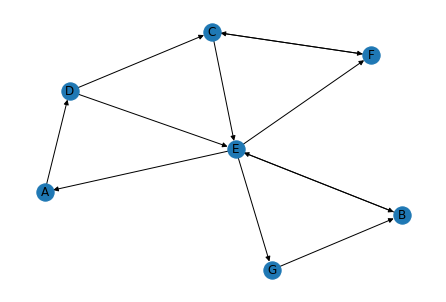

In [12]:
ledges = [('A', 'D'), ('B', 'E'), ('C', 'E'), ('C', 'F'), ('D', 'C'), ('D', 'E'), ('E', 'A'), ('E', 'B'), ('E', 'F'), ('E', 'G'), ('F', 'C'), ('G', 'B')]
i,j = zip(*ledges)            
indexLUT = dict([(l,ord(l)-ord('A')) for l in sorted(set(i+j))])
edges = [(indexLUT[i],indexLUT[j]) for i,j in ledges]
net = tb.Net(edges=edges)
print(nx.info(net.graph))
net.draw()

In [13]:
#net.get_node('E').num_states = 3    # calc cannot handle this
#net.get_node('E').func = tb.tri_func
net.get_node('E').num_states = 2
net.get_node('E').func = tb.or_func
print(net.get_node('E'))
print(net.get_node('A'))

E(4): 2,or_func
A(0): 2,maz_func


In [14]:
net.node_labels

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [15]:
net.cm

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

In [16]:
net.tpm

,A,B,C,D,E,F,G
0000000,0,0,0,0,0,0,0
1000000,0,0,0,1,0,0,0
0100000,0,0,0,0,1,0,0
1100000,0,0,0,1,1,0,0
0010000,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
1101111,1,1,1,1,1,1,1
0011111,1,1,1,0,1,1,1
1011111,1,1,1,1,1,1,1
0111111,1,1,1,0,1,1,1


In [17]:
net.phi() # 0001000 => 0.25

Computing concepts:   0%|          | 0/127 [00:00<?, ?it/s]

Calculating Φ at state=[1, 1, 0, 0, 1, 1, 1]


0.005102

In [18]:
ledges = [('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B')]
i,j = zip(*ledges)            
indexLUT = dict([(l,ord(l)-ord('A')) for l in sorted(set(i+j))])
edges = [(indexLUT[i],indexLUT[j]) for i,j in ledges]
net = tb.Net(edges=edges)
net.get_node('A').func = tb.or_func
net.get_node('B').func = tb.and_func
net.get_node('C').func = tb.xor_func
print(nx.info(net.graph))

edges=[(0, 2), (1, 0), (1, 2), (2, 0), (2, 1)] n_list=[0, 1, 2]
Name: None
Type: DiGraph
Number of nodes: 3
Number of edges: 5
Average in degree:   1.6667
Average out degree:   1.6667


In [19]:
edges2 = [(i+3,j+3) for i,j in edges]
edges2

[(3, 5), (4, 3), (4, 5), (5, 3), (5, 4)]

edges=[(0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (3, 5), (4, 3), (4, 5), (5, 3), (5, 4)] n_list=[0, 1, 2, 3, 4, 5]
Name: None
Type: DiGraph
Number of nodes: 6
Number of edges: 10
Average in degree:   1.6667
Average out degree:   1.6667


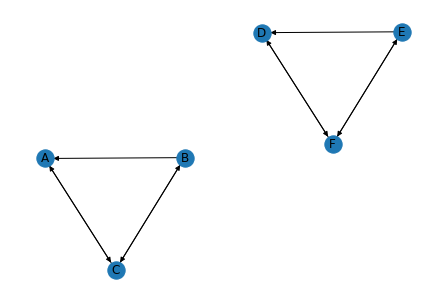

In [20]:
net = tb.Net(edges=edges+edges2)
print(nx.info(net.graph))
net.draw()
net.get_node('A').func = tb.or_func
net.get_node('B').func = tb.and_func
net.get_node('C').func = tb.xor_func
net.get_node('D').func = tb.or_func
net.get_node('E').func = tb.and_func
net.get_node('F').func = tb.xor_func

In [21]:
net.phi()

Calculating Φ at state=[1, 1, 0, 1, 0, 1]


0.0

In [22]:
net.graph.add_edges_from([('C','F'),('F','C')])  # bridge
net.graph.add_edges_from([('D','E'),('A','B')])  # make final node pair of original bi-directional

Name: None
Type: DiGraph
Number of nodes: 6
Number of edges: 14
Average in degree:   2.3333
Average out degree:   2.3333


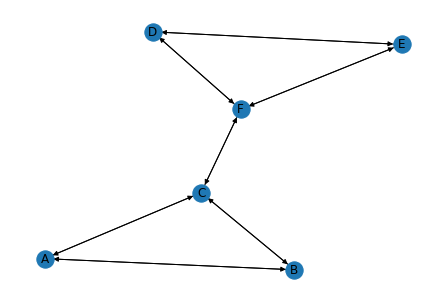

In [23]:
print(nx.info(net.graph))
net.draw()

In [24]:
net.tpm

,A,B,C,D,E,F
000000,0,0,0,0,0,0
100000,0,0,1,0,0,0
010000,1,0,1,0,0,0
110000,1,0,0,0,0,0
001000,1,0,0,0,0,1
...,...,...,...,...,...,...
110111,1,0,1,1,1,0
001111,1,0,1,1,1,1
101111,1,1,0,1,1,1
011111,1,0,0,1,1,1


In [25]:
[(n.label,n.func.__name__,n.num_states) for n in net.nodes]

[('A', 'or_func', 2),
 ('B', 'and_func', 2),
 ('C', 'xor_func', 2),
 ('D', 'or_func', 2),
 ('E', 'and_func', 2),
 ('F', 'xor_func', 2)]

In [26]:
[n.func.__name__ for n in net.nodes]

['or_func', 'and_func', 'xor_func', 'or_func', 'and_func', 'xor_func']

In [27]:
net.info()

{'edges': OutEdgeView([('A', 'C'), ('A', 'B'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'F'), ('D', 'F'), ('D', 'E'), ('E', 'D'), ('E', 'F'), ('F', 'D'), ('F', 'E'), ('F', 'C')]),
 'nodes': [('A', 0, 'or_func'),
  ('B', 1, 'and_func'),
  ('C', 2, 'xor_func'),
  ('D', 3, 'or_func'),
  ('E', 4, 'and_func'),
  ('F', 5, 'xor_func')]}

In [28]:
net.phi('100101')

Computing concepts:   0%|          | 0/63 [00:00<?, ?it/s]

Calculating Φ at state=[1, 0, 0, 1, 0, 1]


8.145427

In [29]:
import datetime
elapsed = toc()  # Seconds since start of Notebook load (assuming fresh run)
print(f'Elapsed seconds={elapsed}')
print(f'Completed on: {str(datetime.datetime.now())}')

Elapsed seconds=58.249438047991134
Completed on: 2020-05-08 14:09:26.830914


----------------
# STOP HERE

In [30]:
# don't go beyond here with Run All
assert False

AssertionError: 

In [ ]:
%time res=tb.phi_all_states(net)

In [ ]:
sorted(set([(s,v) for (s,v) in res.items() if v > 0]), key=lambda x: x[0])

In [ ]:
import pandas as pd
dff = pd.DataFrame(res.items())
ax = dff.plot.hist(bins=100)